In [27]:
using Revise
using BiMDPs


In [28]:
dir = "case005"

"case005"

In [15]:
rgw = case_dictionary[dir]

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles: Array{Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}((433,))
  exit_xys: Array{Tuple{Int64, Int64}}((1,))


## Plot rewards grid

In [16]:
RoverWorld.create_reward_field_evolution_gif(rgw; dir=dir)

"case005/reward_evolution.gif"

## Construct bi-level MDP

In [17]:
hl_mdp, hl_policy = convert_to_bilevel(rgw)

(BiMDPs.HLRoverWorld.HLRoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  exit_xys: Array{Tuple{Int64, Int64}}((1,))
, DiscreteValueIteration.ValueIterationPolicy{Matrix{Float64}, Vector{Float64}, Vector{Int64}, BiMDPs.HLRoverWorld.HLAction, BiMDPs.HLRoverWorld.HLRoverWorldMDP}([96.91187499999998 52.012499999999996 4.75 4.75; 96.91187499999998 52.012499999999996 4.75 4.75; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [96.91187499999998, 96.91187499999998, 96.91187499999998, 96.91187499999998, 96.91187499999998, 96.91187499999998, 96.91187499999998, 96.91187499999998, 96.91187499999998, 96.91187499999998  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], BiMDPs.HLRoverWorld.HLAction[BiMDPs.HLRoverWorld.HLAction(1), BiMDPs.HLRoverWorld.HLAction(2), BiMDPs.HLRoverWorld.HLAction(3), B

## View stepthrough of one HL policy

In [18]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 18, Bool[1, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [19]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 105.0.


## Another example

In [20]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [21]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 55.0.


## From a non-starting state

In [22]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

2-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

In [23]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

3-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]), a = BiMDPs.HLRoverWorld.HLAction(3), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(10, 10, 13, Bool[0, 1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 5.0)

## Compare optimality vs computation time


In [37]:
results = optimality_vs_compute(rgw, [("vi", [1, 5, 50, 100, 150], 500), ("bl_vi", [1, 5, 50, 100, 150], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

Comp_time of vi after 1 iterations: 0.1096473
Reward of vi after 500 simulations: μ = 0.6404883762639355, σ = 20.873554969504525
Comp_time of vi after 5 iterations: 0.5047306
Reward of vi after 500 simulations: μ = 28.79600668498334, σ = 33.349306569307124
Comp_time of vi after 50 iterations: 1.9628565
Reward of vi after 500 simulations: μ = 63.475893279187176, σ = 17.526964848523555
Comp_time of vi after 100 iterations: 1.9687514
Reward of vi after 500 simulations: μ = 63.009744994762535, σ = 18.658678407186628
Comp_time of vi after 150 iterations: 1.8539436
Reward of vi after 500 simulations: μ = 62.49140707150183, σ = 18.302888097206573
Comp_time of bl_vi after 1 iterations: 0.057601
Reward of bl_vi after 500 simulations: μ = 37.34, σ = 20.8973155115958
Comp_time of bl_vi after 5 iterations: 0.2641471
Reward of bl_vi after 500 simulations: μ = 85.77213874999995, σ = 20.410176465785604
Comp_time of bl_vi after 50 iterations: 0.246114
Reward of bl_vi after 500 simulations: μ = 88.1882

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 4 entries:
  "vi"        => ([0.109647, 0.504731, 1.96286, 1.96875, 1.85394], [0.640488, 2…
  "sarsa"     => ([0.005933, 4.09915], [-5.31045, 34.07], [26.3911, 22.0747])
  "bl_vi"     => ([0.057601, 0.264147, 0.246114, 0.244434, 0.295409], [37.34, 8…
  "qlearning" => ([0.0047167, 4.31671], [0.221807, 58.7406], [23.5393, 16.0802])

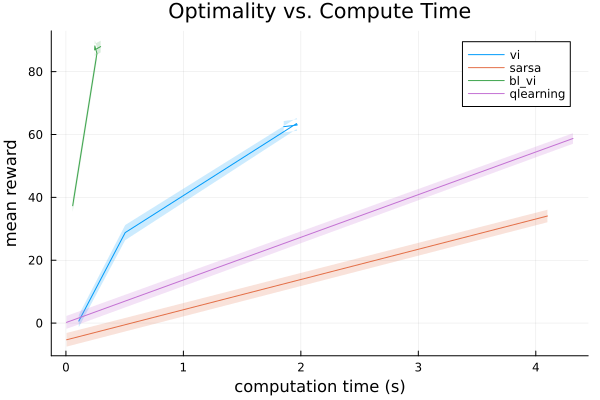

In [38]:
RoverWorld.plot_optimality_vs_compute(results, dir = dir)